# Mean Square Error Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Salary_dataset.csv')

In [2]:
print(data)

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

In [3]:
df=pd.DataFrame(data)
x_train=df['YearsExperience'].to_numpy()
y_train=df['Salary'].to_numpy()

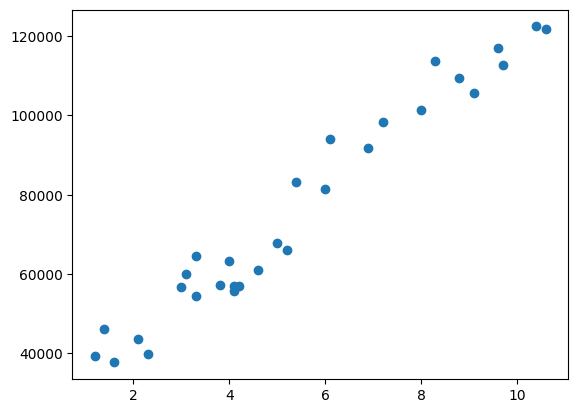

In [4]:
plt.scatter(x_train, y_train)

In [5]:
def cost_function(x, y, w, b):
    m=len(x)
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=cost+ (f_wb - y[i])**2
    total_cost=1/(2*m)*cost
    return total_cost

In [6]:
def gradient_calculation(x, y, w, b):
    m=len(x)
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw=dj_dw+(f_wb - y[i])*x[i]
        dj_db=dj_db+(f_wb - y[i])
    dj_dw= dj_dw/m
    dj_db= dj_db/m
    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha_ini, num_iteration, cost_function, gradient_calculation):
    
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    alpha=alpha_ini
    
    for i in range(num_iteration):
        dj_dw, dj_db = gradient_calculation(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:      
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        if dj_dw<=0.001 and dj_db<=0.001:
            print(f"Iteration {i:4}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            break
        if i % 1000 == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
       
    return w, b, J_history, p_history 

In [8]:
w_ini=0
b_ini=1000000
iteration=100000
alpha_ini = 1.0e-2

w_final, b_final, J_history, p_history = gradient_descent(x_train, y_train, w_ini, b_ini, alpha_ini,
                                                    iteration, cost_function, gradient_calculation)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 223375472878.11063  dj_dw:  4.928e+06, dj_db:  9.240e+05   w: -4.928e+04, b: 9.90760e+05
Iteration 1000: Cost 1576361343.9263124  dj_dw: -3.685e+03, dj_db:  2.511e+04   w: -8.447e+03, b: 1.46788e+05
Iteration 2000: Cost 41135073.74442838  dj_dw: -4.711e+02, dj_db:  3.210e+03   w:  7.162e+03, b: 4.04347e+04
Iteration 3000: Cost 16052095.784929823  dj_dw: -6.021e+01, dj_db:  4.103e+02   w:  9.158e+03, b: 2.68405e+04
Iteration 4000: Cost 15642282.719887538  dj_dw: -7.696e+00, dj_db:  5.244e+01   w:  9.413e+03, b: 2.51029e+04
Iteration 5000: Cost 15635587.07359902  dj_dw: -9.838e-01, dj_db:  6.703e+00   w:  9.445e+03, b: 2.48808e+04
Iteration 6000: Cost 15635477.678162305  dj_dw: -1.257e-01, dj_db:  8.568e-01   w:  9.449e+03, b: 2.48524e+04
Iteration 7000: Cost 15635475.890827512  dj_dw: -1.607e-02, dj_db:  1.095e-01   w:  9.450e+03, b: 2.48487e+04
Iteration 8000: Cost 15635475.861625515  dj_dw: -2.054e-03, dj_db:  1.400e-02   w:  9.450e+03, b: 2.48483e+04
Iteration 90

In [9]:
def compute_model_output(x,w,b):
    m = len(x_train)
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

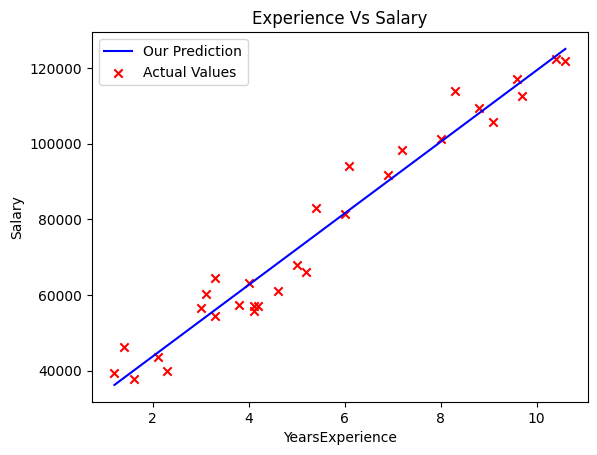

In [10]:
tmp_f_wb = compute_model_output(x_train, w_final, b_final,)
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Experience Vs Salary")
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.legend()
plt.show()

In [11]:
print(f"linear Equation using MSE is f(w,b) = {w_final:8.4f} * x + {b_final:8.4f}")

linear Equation using MSE is f(w,b) = 9449.9616 * x + 24848.2088


# Normal Equation Method

In [12]:
sum_x= np.sum(x_train)
sum_y= np.sum(y_train)
sum_x2=np.sum(np.square(x_train))
sum_xy=np.dot(x_train, y_train)
n=len(x_train)

In [13]:
b=(sum_y*sum_x2-sum_x*sum_xy)/(n*sum_x2-sum_x**2)
w=(n*sum_xy-sum_x*sum_y)/(n*sum_x2-sum_x**2)

In [14]:
print(f"linear Equation using Normal Equation is f(w,b) = {w:8.4f} * x + {b:8.4f}")

linear Equation using Normal Equation is f(w,b) = 9449.9623 * x + 24848.2040


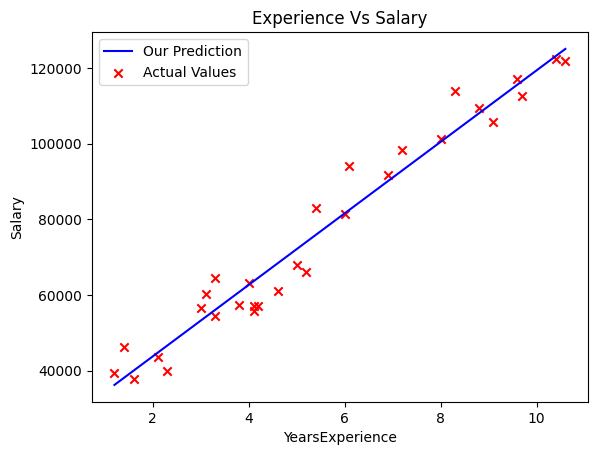

In [15]:
tmp_f_wb = compute_model_output(x_train, w, b,)
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Experience Vs Salary")
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.legend()
plt.show()

# comparison

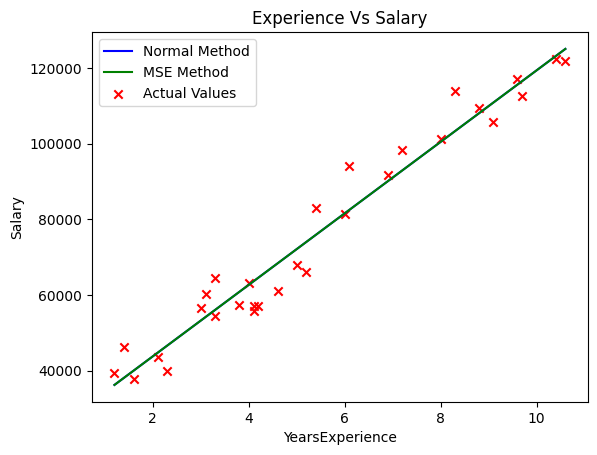

In [16]:
tmp_f_wb1 = compute_model_output(x_train, w, b,)
tmp_f_wb2 = compute_model_output(x_train, w_final, b_final,)
plt.plot(x_train, tmp_f_wb1, c='b',label='Normal Method')
plt.plot(x_train, tmp_f_wb2, c='g',label='MSE Method')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title("Experience Vs Salary")
plt.ylabel('Salary')
plt.xlabel('YearsExperience')
plt.legend()
plt.show()